# Outras Ideias:

Há devoluções próximas do aniversário?

**Juntar categorias** - pode não fazer sentido neste caso, mas falar

Informação por mês:
- Número de clientes
- Número médio de visitas por cliente
- Total das compras
- Valor médio gasto em compras
- Total das devoluções
- Valor médio devolvido
- % de produtos devolvidos por mês
- TOP 10 de produtos devolvidos
- Top 10 dos produtos comprados
- Top 
- Número médio de artigos comprados
- Número médio de produtos comprados
- Número de clientes novos
- Variação de clientes por mês


Análise por semana:
- Número de clientes
- Número de compras
- Número de devoluções


TOP10
Por tipo de loja:
- Dia com mais vendas
- Mês com mais vendas
- Mês com mais devoluções

Loja
- Número médio de artigos comprados
- Número médio de clientes por mês


Cliente
Devoluções
- Percentagem de clientes que devolveram (contar apenas uma vez cada cliente)
    - dos que devolveram quantas vezes em média fizeram devoluções;
    - quantos dias médios até à devolução
    - % que fez devolução total?
    - número médio de artigos devolvidos
    - valor médio devolvido
- Percentagem de clientes que não ficou com nenhum artigo (ou sej, comprou e devolveu tudo)
- Número de devoluções
- Número médio de compras (por ano)
- Número médio dias entre cada compra

Compras
- valor médio gasto por ano (excluido produtos devolvidos)
- Número médio de visitas por cliente

- idade no momento da compra

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import relativedelta
sns.set_style(style = 'ticks')

In [2]:
cust_df = pd.read_pickle(os.path.join('temp', 'customer_eda.pkl'))

In [3]:
cust_df

,customer_Id,DOB,Gender,city_code,age
0,268408,1970-01-02,M,4.0,53
1,269696,1970-01-07,F,8.0,53
2,268159,1970-01-08,F,8.0,53
3,270181,1970-01-10,F,2.0,53
4,268073,1970-01-11,M,1.0,53
...,...,...,...,...,...
5642,274474,1992-12-19,M,2.0,30
5643,267666,1992-12-24,M,6.0,30
5644,270476,1992-12-25,F,3.0,30
5645,269626,1992-12-27,F,5.0,30


In [4]:
df = pd.read_pickle(os.path.join('temp', 'df_eda.pkl'))

In [5]:
df

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,year,tran_date_dt,total_qty_transaction
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,2014,2014-02-28,0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,2014,2014-02-27,0
2,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,2014,2014-02-24,0
3,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,2014,2014-02-22,0
4,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,2014,2014-02-22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22698,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,2011,2011-01-25,1
22699,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,2011,2011-01-25,1
22700,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,2011,2011-01-25,4
22701,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,2011,2011-01-25,0


In [6]:
#Número de clientes por mês

df['month'] = df['tran_date_dt'].dt.month
df['year'] = df['tran_date_dt'].dt.year
numero_clientes_mes= df.groupby(['year','month'])['cust_id'].count().mean()
numero_clientes_mes


597.4473684210526

In [7]:
numero_clientes_mes= df.groupby(['year','month'])['cust_id'].count()
numero_clientes_mes

year  month
2011  1        140
      2        555
      3        643
      4        605
      5        578
      6        564
      7        650
      8        626
      9        657
      10       625
      11       628
      12       617
2012  1        596
      2        601
      3        619
      4        644
      5        652
      6        556
      7        598
      8        616
      9        609
      10       661
      11       646
      12       625
2013  1        604
      2        536
      3        658
      4        583
      5        612
      6        597
      7        618
      8        646
      9        627
      10       650
      11       587
      12       625
2014  1        675
      2        374
Name: cust_id, dtype: int64

In [8]:
#Número médio de visitas por cliente por mês

media_visitas_por_cliente=df.groupby(['year', 'month', 'cust_id'])['cust_id'].count().mean()
media_visitas_por_cliente


1.1305148889552834

In [9]:
# Total das compras por mês
# por numero de transações em que foram realizadas apenas compras (sem devoluções)

total_compras_mes_tran=df[df['Qty']>0].groupby(['year','month'])['transaction_id'].count().mean()
total_compras_mes_tran

546.3421052631579

In [10]:
# Total das compras por mês
# por numero de quantidades compradas (sem devoluções)

total_compras_mes_qty=df[df['Qty']>0].groupby(['year','month'])['Qty'].sum().mean()
total_compras_mes_qty

1640.921052631579

In [11]:
# Valor médio gasto em compras por mês

valor_medio_compras_mes=df[df['Qty']>0].groupby(['year','month'])['total_amt'].sum().mean()
valor_medio_compras_mes

1424690.2834210526

In [12]:
# Total das devoluções por mês
# por numero de transações em que foram realizadas apenas devoluções.

total_devolucoes_mes_tran=df[df['Qty']<0].groupby(['year','month'])['transaction_id'].count().mean()
total_devolucoes_mes_tran.round()

51.0

In [13]:
# Total das devoluções por mês
# por numero de quantidades devolvidas

total_devolucoes_mes_qty=df[df['Qty']<0].groupby(['year','month'])['Qty'].sum().mean()*-1
total_devolucoes_mes_qty.round()

156.0

In [14]:
# Valor médio devolvido por mês

valor_medio_devolvido_mes=df[df['Qty']<0].groupby(['year','month'])['total_amt'].sum().mean()*-1
valor_medio_devolvido_mes

137760.9025

In [15]:
# % de produtos devolvidos por mês 

perc_produtos_devolvidos_por_mês= (df[df['Qty']<0].groupby(['year','month'])['Qty'].sum().sum()*(-1))/(df[df['Qty']>0].groupby(['year','month'])['Qty'].sum().sum())*100
perc_produtos_devolvidos_por_mês

9.495629861278164

In [16]:
# TOP categorias com mais devoluções por mês

topcat_devolvidos_mes=df[df['Qty']<0].groupby(['year', 'month','prod_cat'])['Qty'].sum().groupby('prod_cat').mean().sort_values()*-1
# print(topcat_devolvidos_mes.round())

tmp=topcat_devolvidos_mes.head(10).sort_values()

In [17]:
tmp

prod_cat
Bags                15.189189
Footwear            19.736842
Clothing            21.157895
Electronics         29.605263
Home and kitchen    29.810811
Books               41.500000
Name: Qty, dtype: float64

In [18]:
for x in enumerate(tmp):
    print(x)

(0, 15.18918918918919)
(1, 19.736842105263158)
(2, 21.157894736842106)
(3, 29.605263157894736)
(4, 29.81081081081081)
(5, 41.5)


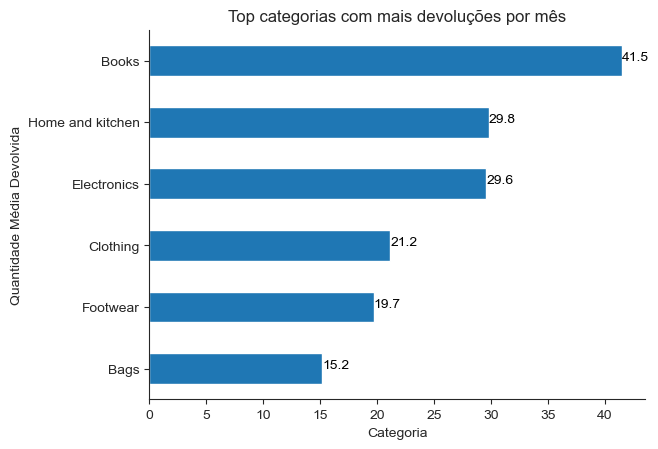

In [19]:
tmp.plot(kind='barh')
plt.title('Top categorias com mais devoluções por mês')
plt.xlabel('Categoria')
for i, v in enumerate(tmp):
    plt.text(v, i, f'{v:.1f}', color='black')
plt.ylabel('Quantidade Média Devolvida')
sns.despine()
plt.show()

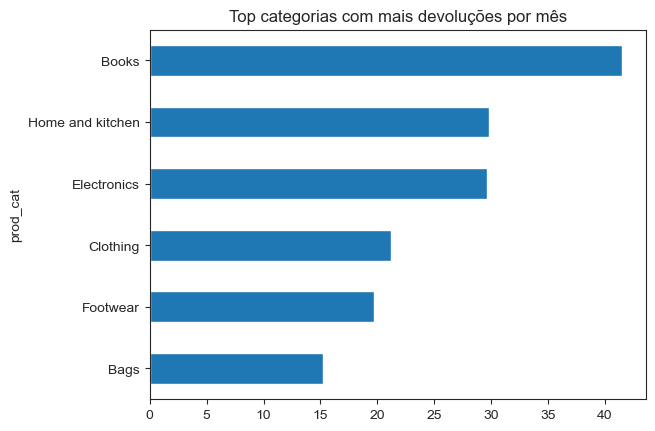

In [20]:
g=tmp.plot(kind='barh')
g.set_title('Top categorias com mais devoluções por mês')
plt.show()

prod_subcat
Women                  23.0
Mens                   20.0
Kids                   14.0
Kitchen                 9.0
Furnishing              9.0
Academic                9.0
Children                9.0
Fiction                 9.0
Comics                  8.0
Bath                    8.0
Mobiles                 8.0
Non-Fiction             8.0
Audio and video         7.0
Computers               7.0
Tools                   7.0
Personal Appliances     7.0
DIY                     7.0
Cameras                 7.0
Name: Qty, dtype: float64


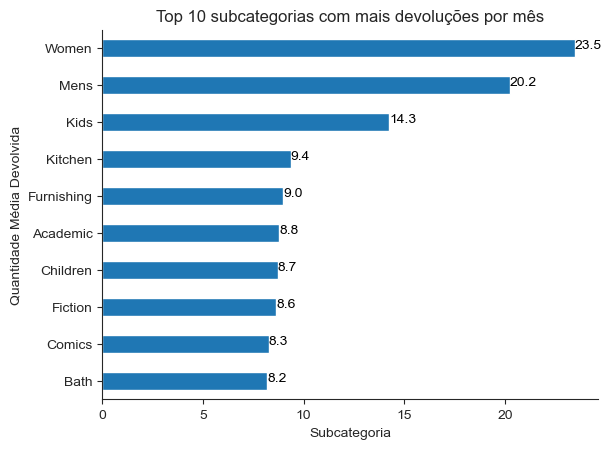

In [21]:
# TOP subcategorias com mais devoluções por mês

topsubcat_devolvidos_mes=df[df['Qty']<0].groupby(['year', 'month','prod_subcat'])['Qty'].sum().groupby('prod_subcat').mean().sort_values()*-1
print(topsubcat_devolvidos_mes.round())


topsubcat_devolvidos_mes.head(10).sort_values().plot(kind='barh')
temp=topsubcat_devolvidos_mes.head(10).sort_values()
plt.title('Top 10 subcategorias com mais devoluções por mês')
plt.xlabel('Subcategoria')
sns.despine()
for i, v in enumerate(temp):
    plt.text(v, i, f'{v:.1f}', color='black')
plt.ylabel('Quantidade Média Devolvida')
plt.show()

In [22]:
categories = pd.read_csv(os.path.join('input', 'prod_cat_info.csv'))
transactions = pd.read_csv(os.path.join('input', 'Transactions.csv.zip'), parse_dates=['tran_date'], dayfirst=True, compression='zip')


In [23]:
transactions

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


In [24]:
#dff = pd.merge(transactions, categories, how='left', left_on=['prod_cat_code', 'prod_subcat_code'], right_on=['prod_cat_code', 'prod_sub_cat_code']).drop('prod_sub_cat_code', axis=1)
print(df.shape)

(22703, 16)


In [25]:
df['produto']=df['prod_cat']+'-'+df['prod_subcat']

In [26]:
df

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,year,tran_date_dt,total_qty_transaction,month,produto
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,2014,2014-02-28,0,2,Clothing-Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,2014,2014-02-27,0,2,Electronics-Computers
2,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,2014,2014-02-24,0,2,Home and kitchen-Bath
3,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,2014,2014-02-22,0,2,Home and kitchen-Bath
4,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,2014,2014-02-22,0,2,Home and kitchen-Tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22698,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,2011,2011-01-25,1,1,Books-Academic
22699,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,2011,2011-01-25,1,1,Clothing-Mens
22700,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,2011,2011-01-25,4,1,Home and kitchen-Furnishing
22701,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,2011,2011-01-25,0,1,Books-Children


In [27]:
# TOP 10 de produtos devolvidos por mês

top10_produtos_devolvidos_mes=df[df['Qty']<0].groupby(['year', 'month','produto'])['Qty'].sum().groupby('produto').mean().sort_values()*-1
top10_produtos_devolvidos_mes.head(10)



produto
Home and kitchen-Kitchen       9.371429
Home and kitchen-Furnishing    9.000000
Clothing-Women                 8.882353
Books-Academic                 8.806452
Books-Children                 8.718750
Books-Fiction                  8.647059
Books-Comics                   8.272727
Bags-Women                     8.250000
Home and kitchen-Bath          8.187500
Footwear-Kids                  8.129032
Name: Qty, dtype: float64

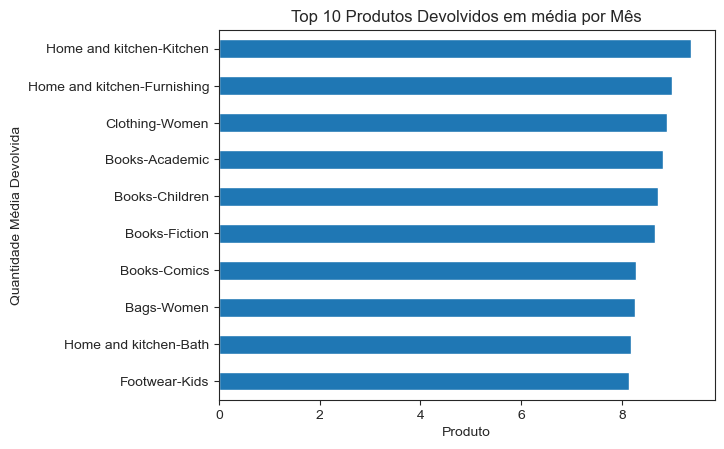

In [28]:
top10_produtos_devolvidos_mes.head(10).sort_values().plot(kind='barh')
plt.title('Top 10 Produtos Devolvidos em média por Mês')
plt.xlabel('Produto')
plt.ylabel('Quantidade Média Devolvida')
plt.show()

In [29]:
tmp = top10_produtos_devolvidos_mes.head(10).reset_index()

In [30]:
tmp

,produto,Qty
0,Home and kitchen-Kitchen,9.371429
1,Home and kitchen-Furnishing,9.000000
2,Clothing-Women,8.882353
3,Books-Academic,8.806452
4,Books-Children,8.718750
5,Books-Fiction,8.647059
6,Books-Comics,8.272727
7,Bags-Women,8.250000
8,Home and kitchen-Bath,8.187500
9,Footwear-Kids,8.129032


<Axes: xlabel='Qty', ylabel='produto'>

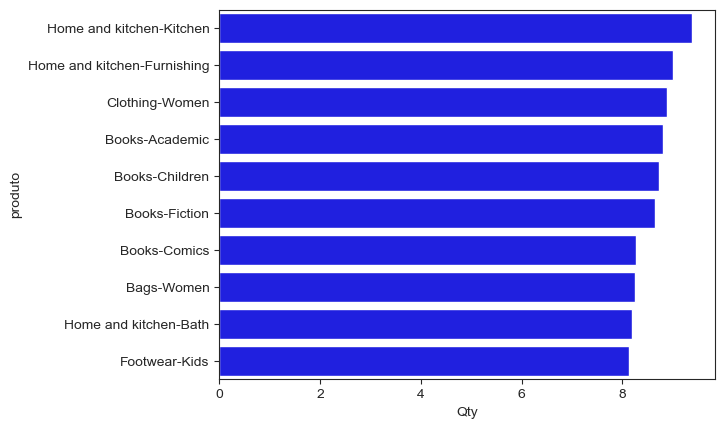

In [31]:
sns.barplot(tmp, x='Qty', y='produto', errorbar=None, color='blue')

In [32]:
# TOP 10 percentagem de produtos devolvidos (total)

df[df['Qty']<0].groupby('produto')['Qty'].count().sort_index()/df[df['Qty']>0].groupby('produto')['Qty'].count().sort_index()*100
#(df[df['Qty']<0].groupby('produto')['Qty'].sum().sort_index())/df[df['Qty']>0].groupby('produto')['Qty'].sum().sort_index()*100



produto
Bags-Mens                           9.810479
Bags-Women                         10.807736
Books-Academic                     10.514019
Books-Children                      9.795479
Books-Comics                        9.249184
Books-DIY                           8.435072
Books-Fiction                      10.554371
Books-Non-Fiction                   8.981380
Clothing-Kids                       8.807135
Clothing-Mens                       9.770115
Clothing-Women                     10.279330
Electronics-Audio and video         7.674685
Electronics-Cameras                 8.836689
Electronics-Computers               8.924485
Electronics-Mobiles                 8.262712
Electronics-Personal Appliances     8.059024
Footwear-Kids                       8.580858
Footwear-Mens                       9.940828
Footwear-Women                      9.925293
Home and kitchen-Bath               9.596510
Home and kitchen-Furnishing         9.777778
Home and kitchen-Kitchen           10.860215
Ho

In [33]:
# TOP 10 de produtos comprados por mês

top10_produtos_comprados_mes=df[df['Qty']>0].groupby(['year', 'month','produto'])['Qty'].sum().groupby('produto').mean().sort_values(ascending=False)
top10_produtos_comprados_mes.head(10)

produto
Books-Fiction                  75.500000
Home and kitchen-Tools         75.105263
Electronics-Mobiles            74.815789
Footwear-Kids                  73.605263
Books-Children                 73.210526
Home and kitchen-Kitchen       73.000000
Home and kitchen-Bath          72.447368
Footwear-Women                 72.342105
Books-Comics                   72.263158
Home and kitchen-Furnishing    71.973684
Name: Qty, dtype: float64

In [34]:
# Número médio de artigos comprados por mês

media_artigos_comprados_mes=df[df['Qty']>0].groupby(['year', 'month'])['Qty'].sum().mean()
media_artigos_comprados_mes


1640.921052631579

In [35]:
# Número médio de compras por mês

media_compras_mes=df[df['Qty']>0].groupby(['year', 'month'])['transaction_id'].count().mean()
media_compras_mes

546.3421052631579

In [36]:
# Número médio de produtos comprados 
media_produtos_comprados_mes=df[df['Qty']>0].groupby(['year', 'month','produto'])['Qty'].sum().groupby('produto').mean().sort_values(ascending=False)
media_produtos_comprados_mes.round()

produto
Books-Fiction                      76.0
Home and kitchen-Tools             75.0
Electronics-Mobiles                75.0
Footwear-Kids                      74.0
Books-Children                     73.0
Home and kitchen-Kitchen           73.0
Home and kitchen-Bath              72.0
Footwear-Women                     72.0
Books-Comics                       72.0
Home and kitchen-Furnishing        72.0
Clothing-Women                     72.0
Books-Non-Fiction                  71.0
Electronics-Audio and video        71.0
Electronics-Personal Appliances    70.0
Clothing-Kids                      70.0
Bags-Women                         70.0
Bags-Mens                          70.0
Electronics-Cameras                70.0
Books-DIY                          69.0
Electronics-Computers              69.0
Clothing-Mens                      69.0
Books-Academic                     68.0
Footwear-Mens                      67.0
Name: Qty, dtype: float64

In [37]:
# Número de clientes por mês

novos_clientes= df.groupby(['year', 'month'])['cust_id'].nunique()
novos_clientes

year  month
2011  1        134
      2        482
      3        564
      4        534
      5        511
      6        511
      7        574
      8        549
      9        573
      10       557
      11       561
      12       536
2012  1        534
      2        517
      3        549
      4        561
      5        568
      6        508
      7        533
      8        529
      9        542
      10       576
      11       573
      12       556
2013  1        532
      2        472
      3        584
      4        519
      5        535
      6        522
      7        547
      8        580
      9        556
      10       577
      11       532
      12       556
2014  1        599
      2        339
Name: cust_id, dtype: int64

In [38]:
# Variação de clientes por mês

variacao_clientes_mes= df.groupby(['year', 'month'])['cust_id'].nunique().diff().mean()
variacao_clientes_mes

5.54054054054054

In [40]:
# Número de clientes por semana

numero_clientes_semana = df.groupby(pd.Grouper(key='tran_date_dt', freq='1W'))['cust_id'].count()
numero_clientes_semana.round()


tran_date_dt
2011-01-30    118
2011-02-06    147
2011-02-13    128
2011-02-20    139
2011-02-27    150
             ... 
2014-02-02    142
2014-02-09    143
2014-02-16    123
2014-02-23     70
2014-03-02      3
Freq: W-SUN, Name: cust_id, Length: 162, dtype: int64

In [41]:
# Número de compras por semana

numero_compras_semana = df[df['Qty']>0].groupby(pd.Grouper(key='tran_date_dt', freq='1W'))['Qty'].sum().mean()
numero_compras_semana.round()

387.0

In [42]:
# Número de devoluções por semana

numero_devolucoes_semana = df[df['Qty']<0].groupby(pd.Grouper(key='tran_date_dt', freq='1W'))['Qty'].sum().mean()*-1
numero_devolucoes_semana.round()


37.0

In [43]:
# Por tipo de loja: TOP10 Dia com mais vendas
dia_mais_vendas= df[df['Qty']>0].groupby(['tran_date','Store_type'])['Qty'].sum().reset_index().sort_values(by=['Store_type','Qty'], ascending=[False, False]).groupby('Store_type') 
dia_mais_vendas.head(10)

,tran_date,Store_type,Qty
1193,17-04-2011,e-Shop,52
278,10/9/2012,e-Shop,51
4190,8/4/2013,e-Shop,49
2024,22-01-2012,e-Shop,48
3170,3/1/2014,e-Shop,48
3946,6/8/2013,e-Shop,48
916,15-05-2011,e-Shop,47
1505,19-05-2013,e-Shop,47
2238,23-07-2012,e-Shop,47
3974,7/10/2011,e-Shop,47


In [44]:
# TOP10 Por tipo de loja: Mês com mais vendas

mes_mais_vendas= df[df['Qty']>0].groupby(['year','month','Store_type'])['Qty'].sum().reset_index().sort_values(by=['Store_type','Qty'], ascending=[False, False]).groupby('Store_type')
mes_mais_vendas.head(10)

,year,month,Store_type,Qty
147,2014,1,e-Shop,820
107,2013,3,e-Shop,814
135,2013,10,e-Shop,787
39,2011,10,e-Shop,761
67,2012,5,e-Shop,727
95,2012,12,e-Shop,726
11,2011,3,e-Shop,718
87,2012,10,e-Shop,718
83,2012,9,e-Shop,710
99,2013,1,e-Shop,707


In [45]:
# TOP10 Por tipo de loja: Mês com mais devoluções

mes_mais_devolucoes= df[df['Qty']<0].groupby(['year','month','Store_type'])['Qty'].sum()*-1
mes_mais_devolucoes=mes_mais_devolucoes.reset_index().sort_values(by=['Store_type','Qty'], ascending=[False, False]).groupby('Store_type')
mes_mais_devolucoes.head(10)

,year,month,Store_type,Qty
31,2011,8,e-Shop,113
63,2012,4,e-Shop,94
67,2012,5,e-Shop,93
15,2011,4,e-Shop,89
147,2014,1,e-Shop,88
123,2013,7,e-Shop,86
95,2012,12,e-Shop,79
39,2011,10,e-Shop,78
87,2012,10,e-Shop,78
131,2013,9,e-Shop,77


In [46]:
# Número médio de artigos comprados por loja

media_artigos_vendido_loja= df[df['Qty']>0].groupby('Store_type')['Qty'].sum().groupby('Store_type').mean() 
media_artigos_vendido_loja

Store_type
Flagship store    12389.0
MBR               12518.0
TeleShop          12147.0
e-Shop            25301.0
Name: Qty, dtype: float64

In [47]:
# Número médio de clientes por mês por loja

In [48]:
media_clientes_mes_loja= df.groupby(['year','month','Store_type'])['cust_id'].count().groupby('Store_type').mean() 
media_clientes_mes_loja

Store_type
Flagship store    118.473684
MBR               121.105263
TeleShop          116.526316
e-Shop            241.342105
Name: cust_id, dtype: float64

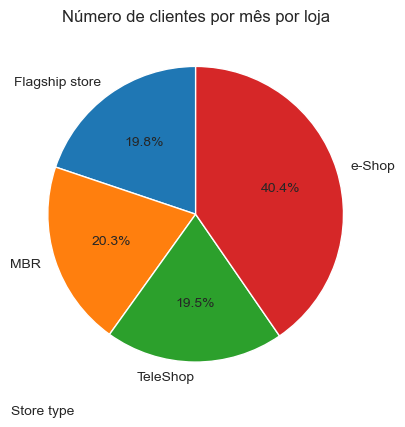

In [49]:
media_clientes_mes_loja.plot.pie(autopct='%1.1f%%', startangle=90)
plt.ylabel(None)
plt.title('Número de clientes por mês por loja')
plt.xlabel('Store type', loc='left')
plt.show()

In [50]:
#clientes_mes_loja= df.groupby(['year','month','Store_type'])['cust_id'].count()
#clientes_mes_loja
(jhwgduy)

NameError: name 'jhwgduy' is not defined

In [51]:
df[df['Qty']<0][´'to']

SyntaxError: invalid character '´' (U+00B4) (3746328640.py, line 1)

In [52]:
clientes_mes_loja = df.groupby([pd.Grouper(key='tran_date_dt', freq='1M'), 'Store_type'])['cust_id'].count()
clientes_mes_loja

tran_date_dt  Store_type    
2011-01-31    Flagship store     34
              MBR                23
              TeleShop           28
              e-Shop             55
2011-02-28    Flagship store    113
                               ... 
2014-01-31    e-Shop            302
2014-02-28    Flagship store     71
              MBR                72
              TeleShop           73
              e-Shop            158
Name: cust_id, Length: 152, dtype: int64

<Axes: xlabel='tran_date_dt'>

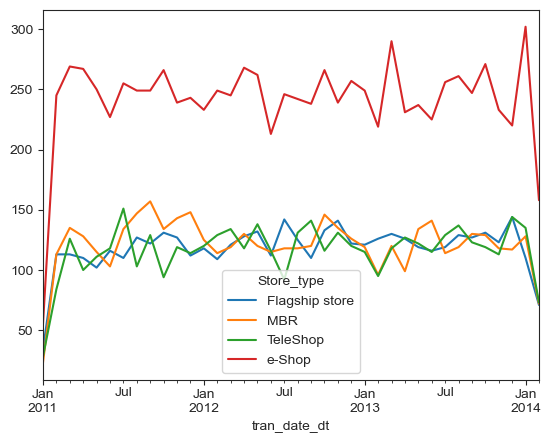

In [53]:
clientes_mes_loja.unstack(level=1).plot()

C:\Users\francisco\anaconda3\1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\francisco\anaconda3\1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


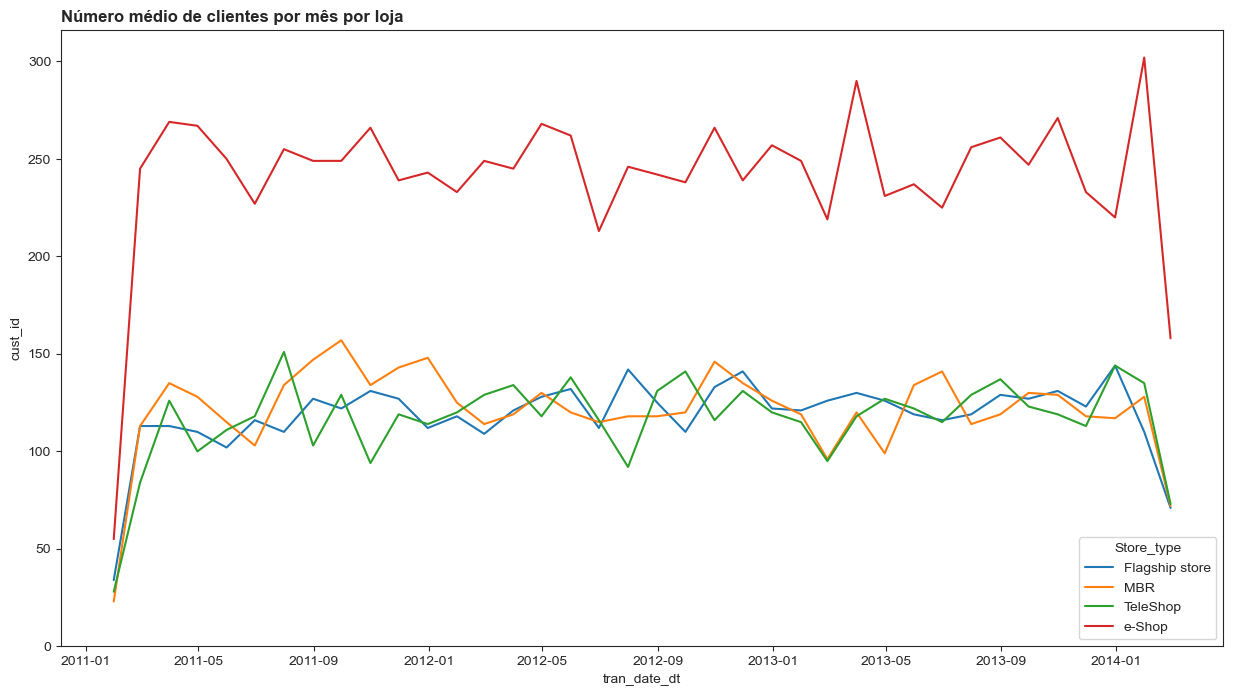

In [54]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=clientes_mes_loja.reset_index(), x='tran_date_dt', y='cust_id', hue='Store_type')
plt.title('Número médio de clientes por mês por loja', loc='left', fontdict=dict(fontweight='bold'))
plt.ylim(0)
plt.show()

In [55]:
# Percentagem de clientes que devolveram (contar apenas uma vez cada cliente)

perc_clientes_que_devolveram= (df[df['Qty']<0].groupby('cust_id')['cust_id'].nunique().sum())/(df[df['Qty']>0].groupby('cust_id')['cust_id'].nunique().sum())*100
perc_clientes_que_devolveram

29.96547337815737

In [56]:
# Percentagem de clientes que devolveram (contar apenas uma vez cada cliente)

clientes_devolveram = df[df['Qty'] < 0]['cust_id'].nunique()
total_clientes = df[df['Qty'] > 0]['cust_id'].nunique()

perc_clientes_devolveram = (clientes_devolveram / total_clientes) * 100
perc_clientes_devolveram

29.96547337815737

In [57]:
# dos que devolveram quantas vezes em média fizeram devoluções

clientes_devolveram = df[df['Qty']<0].groupby('cust_id')['transaction_id'].nunique().mean()
clientes_devolveram

1.1776834445118254

In [58]:
# % que fez devolução total

perc_clientes_que_devolveram= (df[df['Qty']<0].groupby('cust_id')['transaction_id'].count().sum())/(df[df['Qty']>0].groupby('cust_id')['transaction_id'].count().sum())*100
perc_clientes_que_devolveram

9.354077356582053

In [59]:
# número médio de artigos devolvidos (por cliente?)

media_artigos_devolvidos=df[df['Qty']<0].groupby('cust_id')['Qty'].sum().mean()*-1
media_artigos_devolvidos

3.5906610066707096

In [60]:
# valor médio devolvido (por cliente?)

valor_medio_devolvido=df[df['Qty']<0].groupby('cust_id')['total_amt'].sum().mean()*-1
valor_medio_devolvido

3174.599329896907

In [61]:
df[df['total_qty_transaction']==0]

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,year,tran_date_dt,total_qty_transaction,month,produto
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,2014,2014-02-28,0,2,Clothing-Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,2014,2014-02-27,0,2,Electronics-Computers
2,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,2014,2014-02-24,0,2,Home and kitchen-Bath
3,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,2014,2014-02-22,0,2,Home and kitchen-Bath
4,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,2014,2014-02-22,0,2,Home and kitchen-Tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22682,90114483354,268097,26-01-2011,10,5,4,1408,591.360,6223.360,e-Shop,Books,Non-Fiction,2011,2011-01-26,0,1,Books-Non-Fiction
22683,32887353269,268885,25-01-2011,3,1,1,276,28.980,304.980,Flagship store,Clothing,Kids,2011,2011-01-25,0,1,Clothing-Kids
22684,28972634039,275227,25-01-2011,9,3,1,334,35.070,369.070,MBR,Electronics,Cameras,2011,2011-01-25,0,1,Electronics-Cameras
22685,42161597232,267094,25-01-2011,3,1,3,147,46.305,487.305,MBR,Clothing,Kids,2011,2011-01-25,0,1,Clothing-Kids


In [62]:
# Percentagem de clientes que não ficou com nenhum artigo (ou seja, comprou e devolveu tudo)

# dff=df.groupby("transaction_id")["Qty"].sum().reset_index().groupby("Qty").count()
# print(dff)
# df['total_qty_transaction'] = df.groupby('transaction_id')['Qty'].transform('sum')
# perc_clientes_devolveram_tudo=(df[df['total_qty_transaction']==0].groupby('cust_id')['cust_id'].nunique().count())/(df[df['Qty']>0].groupby('cust_id')['cust_id'].nunique().sum())
# perc_clientes_devolveram_tudo

aaa=(df[df['total_qty_transaction']==0].groupby('cust_id')['cust_id'].nunique().count())
aaa
bbb=df['cust_id'].nunique()
a=(aaa/bbb)*100
a

29.96547337815737

In [63]:
# Número de devoluções por transação
numero_devolucoes_por_tran=df[df['Qty']<0]['transaction_id'].count()
numero_devolucoes_por_tran


1942

In [64]:
# Número de devoluções por quantidades
numero_devolucoes_por_qty=df[df['Qty']<0]['Qty'].sum()*-1
numero_devolucoes_por_qty

5921

In [65]:
# Número médio de compras (por ano)

numero_compras_ano = df[df['Qty']>0].groupby(pd.Grouper(key='tran_date_dt', freq='1Y'))['Qty'].sum().mean()
numero_compras_ano.round()

15589.0

In [66]:
# Número médio dias entre cada compra (nao existem compras todos os dias??) 


In [67]:
# Valor médio gasto em compras por ano (excluido produtos devolvidos)

total_ano_compras = df[df['Qty']>0].groupby(pd.Grouper(key='tran_date_dt', freq='1Y'))['total_amt'].sum().mean()
total_ano_compras

13534557.6925

In [68]:
#  Número médio de visitas por cliente (ano?)

visitas_ano = df.groupby(pd.Grouper(key='tran_date_dt', freq='1Y'))['cust_id'].count().mean()
visitas_ano.round()

5676.0

In [69]:
# idade no momento da compra (média?)

dfff = pd.merge(cust_df, df, how='inner', left_on=['customer_Id'], right_on=['cust_id']).drop('cust_id', axis=1)
dfff 

,customer_Id,DOB,Gender,city_code,age,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,...,Tax,total_amt,Store_type,prod_cat,prod_subcat,year,tran_date_dt,total_qty_transaction,month,produto
0,268408,1970-01-02,M,4.0,53,87243835584,13-01-2014,7,5,5,...,98.175,1033.175,TeleShop,Books,Fiction,2014,2014-01-13,5,1,Books-Fiction
1,268408,1970-01-02,M,4.0,53,16197868036,16-12-2013,1,4,-5,...,110.250,-1160.250,Flagship store,Bags,Mens,2013,2013-12-16,0,12,Bags-Mens
2,268408,1970-01-02,M,4.0,53,16197868036,12/12/2013,1,4,5,...,110.250,1160.250,Flagship store,Bags,Mens,2013,2013-12-12,0,12,Bags-Mens
3,268408,1970-01-02,M,4.0,53,28810141075,2/9/2013,10,6,2,...,170.730,1796.730,TeleShop,Home and kitchen,Kitchen,2013,2013-09-02,2,9,Home and kitchen-Kitchen
4,268408,1970-01-02,M,4.0,53,64633435931,6/5/2013,4,2,3,...,98.280,1034.280,Flagship store,Footwear,Kids,2013,2013-05-06,3,5,Footwear-Kids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22698,269626,1992-12-27,F,5.0,30,71369029396,18-10-2011,12,6,1,...,66.990,704.990,e-Shop,Home and kitchen,Tools,2011,2011-10-18,1,10,Home and kitchen-Tools
22699,269626,1992-12-27,F,5.0,30,94134051896,7/7/2011,3,1,3,...,339.570,3573.570,MBR,Clothing,Kids,2011,2011-07-07,3,7,Clothing-Kids
22700,274308,1992-12-29,F,5.0,30,26208690928,22-10-2012,1,2,2,...,188.580,1984.580,MBR,Footwear,Mens,2012,2012-10-22,2,10,Footwear-Mens
22701,274308,1992-12-29,F,5.0,30,57358822237,5/9/2012,1,2,4,...,367.920,3871.920,e-Shop,Footwear,Mens,2012,2012-09-05,4,9,Footwear-Mens


In [70]:
media_idade_na_compra=dfff[dfff['Qty']>0].groupby('transaction_id')['age'].sum().mean()
media_idade_na_compra

41.79302538413371

In [71]:
idade_na_compra=dfff[dfff['Qty']>0].groupby('transaction_id')['age'].sum() #metodo .sum() dá neste caso porque só existem valores unicos para idade (transações unicas)
idade_na_compra

transaction_id
3268991        48
7073244        53
10861359       49
15741026       37
16165359       39
               ..
99963516507    48
99967775192    33
99985121471    40
99986751618    44
99987549630    37
Name: age, Length: 20761, dtype: int64

In [72]:
idade_na_compra=dfff[dfff['Qty']>0].groupby('transaction_id')['age'].first() #se houver várias entradas de idade para a mesma transação, apenas a primeira idade encontrada é considerada
idade_na_compra

transaction_id
3268991        48
7073244        53
10861359       49
15741026       37
16165359       39
               ..
99963516507    48
99967775192    33
99985121471    40
99986751618    44
99987549630    37
Name: age, Length: 20761, dtype: int64